# 🎓 **Taller 4.4: Taller de Métodos de clustering basados en particiones Parte 3**


## OBJETIVOS DEL TALLER:
En esta práctica estudiaremos el funcionamiento y la utilización métodos de clustering basados en particiones como el K-medoids.

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools as it

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = [8, 8]

# 📁 **CARGAR LOS DATASETS Y GRAFICAR SUS DISTRIBUCIONES**

In [2]:
# Cargar dataset artificial
def cargar_dataset(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_excel(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

def cargar_dataset_csv(nombre_dataset):
    try:
        # Intentar cargar desde URL alternativa
        data_file_url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/04-MODELOS-NO-SUPERVISADOS/data/"+nombre_dataset
        D = np.array(pd.read_csv(data_file_url,header=0))
        print("✅ Dataset cargado desde URL GitHub")
        return D
    except:
        print("❌ No se pudo cargar el dataset")
        return None

✅ Dataset cargado desde URL GitHub


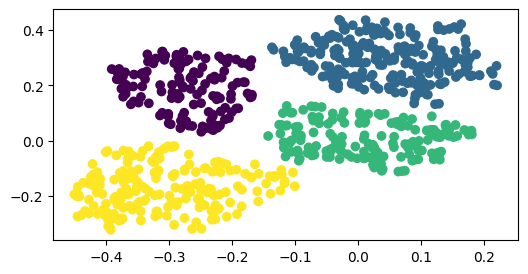

In [3]:
# Cargar dataset
D =cargar_dataset_csv("dataset_cuatro_separables_peque.csv")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

# 🎯 **:Cree el algoritmo K-medoids que tiene un único parámetro: el número de clústeres (K).**

In [4]:
# PASO 1 elejir los medoides iniciales de forma randomica
def paso1_elije_medoides(K, Dx):
  indices_aleatorios = np.random.choice(Dx.shape[0], K, replace=False)
  cDx = Dx[indices_aleatorios, :]
  return cDx


Los centros iniciales elegidos aleatoriamente son:
[[ 0.0435187   0.3132    ]
 [-0.132671   -0.126496  ]
 [-0.365835    0.192363  ]
 [-0.0911196   0.00175883]]


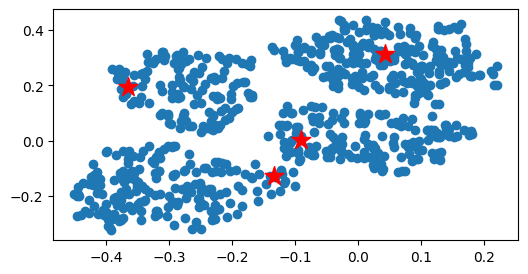

In [5]:
print('Los centros iniciales elegidos aleatoriamente son:')
K=4
cDx = paso1_elije_medoides(K, Dx)
print(cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1])
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de asignación de datos
En este paso, cada elemento de nuestro dataset se asigna al medoide más cercano basado en la distancia escogida: en nuestro caso, la Euclidiana. Por tanto, tendremos que implementar la siguiente operación:

$$
\DeclareMathOperator*{\argminA}{arg\,min}
\argminA_{c_i \in C} dist\left ( c_i, x \right )^2
$$

In [6]:
# Definimos la distancia euclidiana de una instancia x
# con respecto a un grupo de instancias C
def distancia_euclidiana_grupo(x, C):
    return np.sqrt(np.sum(np.power(C-x,2),axis=1))

def distancia_euclidiana(x, y):
    return np.sqrt(np.sum((x-y)**2))

def matriz_distancias(X, distancia):
    mD = np.zeros((X.shape[0],X.shape[0]))
    for pair in it.product(np.arange(X.shape[0]), repeat=2):
        mD[pair] = distancia(X[pair[0],:],X[pair[1],:])
    return mD

def paso2_asigna_puntos(Dx, cDx):
    Dyp = np.zeros(Dx.shape[0])
    # Buscamos el centro más cercano a cada instancia y la asignamos a ese clúster
    for i in np.arange(Dx.shape[0]):
        # Tenemos que calcular la distancia de cada muestra del dataset Dx[i]
        # a cada centro existente en cDx. Podemos utilizar para ello la función
        # distancia_euclidiana_grupo.

        distancia_punto_a_centros = distancia_euclidiana_grupo(Dx[i, :], cDx)

        # Una vez calculada la distancia, necesitamos averiguar el índice de
        # la distancia mínima. Para ello, podemos usar la función argmin de numpy.
        pred_y = np.argmin(distancia_punto_a_centros)
        Dyp[i] = pred_y
    return Dyp

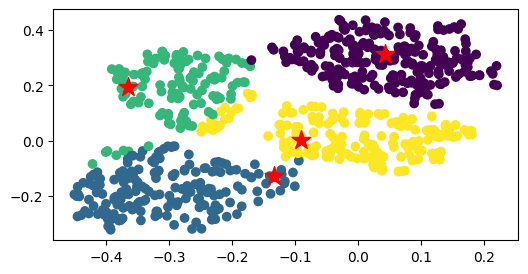

In [7]:
DyM = paso2_asigna_puntos(Dx, cDx)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

2.   Paso de actualización del medoide

In [8]:
def paso3_actualiza_medoides(Dx, cDx, Dyp, K):
  cDx_ant = cDx.copy()
  # Calcular los nuevos centros
  for k in range(K):
      # En este caso lo que buscamos es el elemento del cluster que reduce la
      # distancia con respecto a todos los demás elementos. Para ello, calculamos
      # las distancias entre todos los elementos del cluster `k` y las almacenamos
      # en `mat`.

      # Primero, obtenemos un vector binario indicando qué elementos de Dyp pertenecen a k
      indices_elementos_k = (Dyp == k)

      # Luego calculamos las distancias entre cada uno de los elementos de `Dx`
      # que nuestra predicción dice que pertenecen al custer `k` y los demás.

      mat =  matriz_distancias(Dx[indices_elementos_k, :], distancia_euclidiana)

      # Ahora buscamos el elemento con menor distancia dentro del
      # cluster `k` y nos quedamos con su índice (usando np.argmin, que busca
      # el mínimo de un vector y nos devuelve su índice).

      ic =np.where(Dyp==k)[0][np.argmin(np.sum(mat, axis=1))]

      # Asignamos como centro del cluster al elemento del cluster que ofrece
      # la menor distancia con respecto a todos los demás
      cDx[k,:] =  Dx[ic, :]
  return cDx

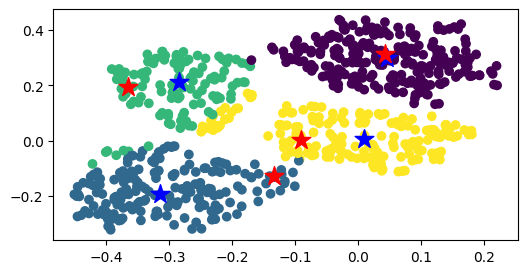

In [9]:
cDx_ant = cDx.copy()
cDx =paso3_actualiza_medoides(Dx, cDx, DyM, K)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=DyM)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='b')
ax.scatter(cDx_ant[:,0],cDx_ant[:,1], marker='*', s=200, c='r')

Y esto es todo. Este proceso se repite hasta cumplir un criterio de detención:

*   No hay cambios en los puntos asignados a cada cluster
*   La suma de las distancias alcanza un valor mínimo establecido
*   Se alcanza un número máximo de iteraciones

In [10]:
def MyKMedoide(Dx, K):
  cDx =  paso1_elije_medoides(K, Dx)
  # Flag de convergencia
  iterando = True
  Dyp = np.zeros(Dx.shape[0])
  while iterando:
    # Vector auxiliar para guardar los centros de la iteración pasada
    # necesarios para identificar la convergencia
    cDx_ant = cDx.copy()
    Dyp = paso2_asigna_puntos(Dx, cDx)
    # Calcular los nuevos centros
    cDx =  paso3_actualiza_medoides(Dx, cDx, Dyp, K)
    iterando = (np.absolute(np.sum(cDx-cDx_ant)) > 0.00001)
  return cDx, Dyp

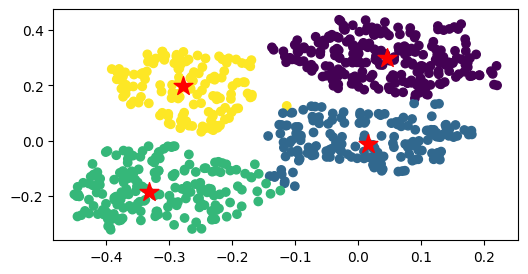

In [11]:
cDx, Dyp = MyKMedoide(Dx, 4)
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp)
ax.scatter(cDx[:,0],cDx[:,1], marker='*', s=200, c='r')

# 🎯 **EJ 3: COMPARA KMEDOIDS CON KMEANS++**


K-Means++:


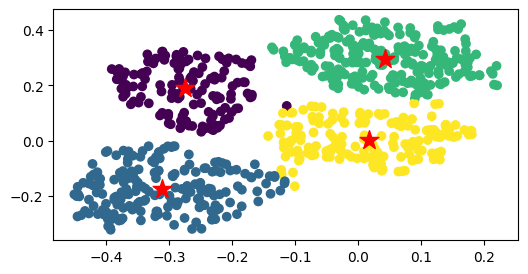

In [12]:
from sklearn.cluster import KMeans

modelo = KMeans(4)
modelo.fit(Dx)
modelo.predict(Dx)
Dyp_sk =  modelo.labels_
# Obtener los centros de los clústeres
cDx_sk = modelo.cluster_centers_

print('K-Means++:')
# Ver asignaciones finales
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dyp_sk)
ax.scatter(cDx_sk[:,0],cDx_sk[:,1], marker='*', s=200, c='r')

### Calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

In [13]:
 ## P10. Tu código aquí ##
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Función auxiliar para calcular inercia de K-Medoids (ya que no es un atributo directo)
def calcular_inercia(X, labels, centros):
    inercia = 0
    for k in range(len(centros)):
        puntos_cluster = X[labels == k]
        inercia += np.sum((puntos_cluster - centros[k])**2)
    return inercia

# --- Cálculo de métricas para K-Medoids (Tu algoritmo) ---
sil_km = silhouette_score(Dx, Dyp)
ch_km = calinski_harabasz_score(Dx, Dyp)
ine_km = calcular_inercia(Dx, Dyp, cDx)

# --- Cálculo de métricas para K-Means++ (Sklearn) ---
sil_sk = silhouette_score(Dx, Dyp_sk)
ch_sk = calinski_harabasz_score(Dx, Dyp_sk)
ine_sk = modelo.inertia_

print(f"{'Métrica':<25} | {'K-Medoids (Manual)':<20} | {'K-Means++ (Sklearn)':<20}")
print("-" * 70)
print(f"{'Silhouette Score':<25} | {sil_km:<20.4f} | {sil_sk:<20.4f}")
print(f"{'Calinski-Harabasz':<25} | {ch_km:<20.4f} | {ch_sk:<20.4f}")
print(f"{'Inercia':<25} | {ine_km:<20.4f} | {ine_sk:<20.4f}")

Métrica                   | K-Medoids (Manual)   | K-Means++ (Sklearn) 
----------------------------------------------------------------------
Silhouette Score          | 0.5361               | 0.5362              
Calinski-Harabasz         | 1342.4217            | 1346.0006           
Inercia                   | 9.0170               | 8.8982              


Calidad de la Agrupación (Silhouette Score): Ambos algoritmos obtuvieron resultados prácticamente idénticos (0.5361 vs 0.5362). Un valor por encima de 0.5 indica que ambos modelos lograron encontrar una estructura razonable y que los clusters están bien definidos, con una separación clara entre ellos a pesar de las diferencias en la densidad de los datos.

Separación y Compacidad (Calinski-Harabasz): El índice de K-Means++ (1346.00) es ligeramente superior al de K-Medoids (1342.42). Esto sugiere que K-Means++ logra una relación un poco más óptima entre la dispersión interna de los grupos y la distancia entre sus centros.

Minimización del Error (Inercia): Como era de esperarse, la inercia de K-Means++ (8.8982) es menor que la de K-Medoids (9.0170). Esto ocurre porque K-Means tiene la libertad de situar el centroide en el promedio exacto del grupo, mientras que K-Medoids está restringido a elegir un punto real del dataset como centro, lo que siempre genera un error cuadrático ligeramente mayor.

### ahora prueba con otro dataset, calcula las metricas que te permita determinar que algoritmo agrupo mejor los datos y escbribe la conclusión.

✅ Dataset cargado desde URL GitHub


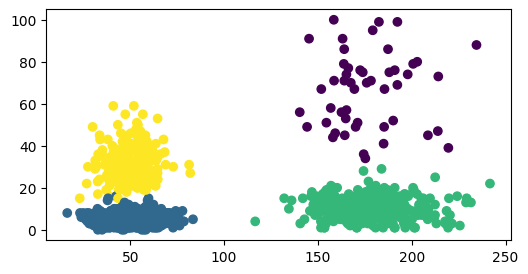

In [14]:
# Cargar dataset
D =cargar_dataset("dataset_cuatro_diferente_densidad.xlsx")
Dx = D[:,0:2]
Dy = D[:,2]
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0],Dx[:,1], c=Dy)

Resultado K-Means++:


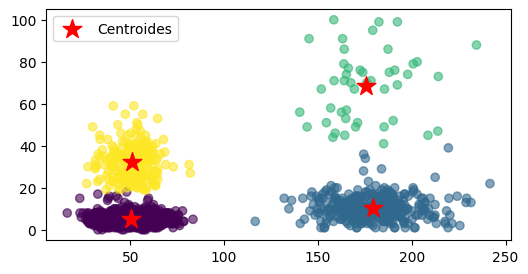

In [17]:
 ## aplica kMeans ++
 ## P11. Tu código aquí ##
from sklearn.cluster import KMeans

# 1. Configurar y entrenar K-Means++
modelo_sk = KMeans(n_clusters=4, init='k-means++', random_state=42, n_init=10)
Dyp_sk = modelo_sk.fit_predict(Dx)
cDx_sk = modelo_sk.cluster_centers_

print('Resultado K-Means++:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_sk, cmap='viridis', alpha=0.6)
ax.scatter(cDx_sk[:,0], cDx_sk[:,1], marker='*', s=200, c='red', label='Centroides')
plt.legend()
plt.show()

Resultado K-Medoides:


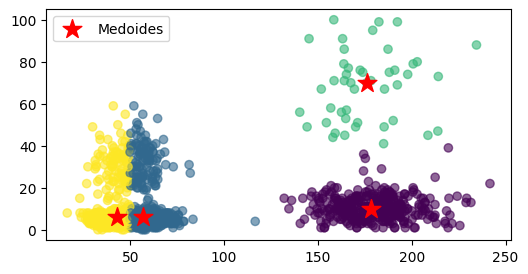


COMPARATIVA DE METRICAS:
K-Means++  | Silhouette: 0.5900 | Calinski-Harabasz: 10596.2
K-Medoides | Silhouette: 0.4308 | Calinski-Harabasz: 9832.1


In [16]:
 ## aplica kMedoide
 ## P12. Tu código aquí ##
 # 1. Ejecutar la funcion de K-Medoides
cDx_km, Dyp_km = MyKMedoide(Dx, 4)

# 2. Visualizar resultados
print('Resultado K-Medoides:')
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(Dx[:,0], Dx[:,1], c=Dyp_km, cmap='viridis', alpha=0.6)
ax.scatter(cDx_km[:,0], cDx_km[:,1], marker='*', s=200, c='red', label='Medoides')
plt.legend()
plt.show()

# CÁLCULO DE MÉTRICAS PARA COMPARAR
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Métricas K-Means++
sil_sk = silhouette_score(Dx, Dyp_sk)
ch_sk = calinski_harabasz_score(Dx, Dyp_sk)

# Métricas K-Medoides
sil_km = silhouette_score(Dx, Dyp_km)
ch_km = calinski_harabasz_score(Dx, Dyp_km)

print(f"\nCOMPARATIVA DE METRICAS:")
print(f"K-Means++  | Silhouette: {sil_sk:.4f} | Calinski-Harabasz: {ch_sk:.1f}")
print(f"K-Medoides | Silhouette: {sil_km:.4f} | Calinski-Harabasz: {ch_km:.1f}")

Superioridad de K-Means++: En este dataset, K-Means++ es claramente el ganador. Su Silhouette Score es significativamente mayor al de K-Medoides. Mientras que el valor de 0.59 indica una estructura "razonable" y bien definida, el 0.43 de K-Medoides sugiere una estructura débil.

Análisis Visual de los Medoides: En el gráfico se observa un problema común: dos de los medoides (las estrellas rojas de la izquierda) han quedado atrapados muy cerca uno del otro en la zona de alta densidad. Esto ha provocado que el algoritmo no logre capturar correctamente la separación natural de los datos en esa área, "partiendo" grupos de forma ineficiente.

Sensibilidad a la Densidad y la Inicialización:
K-Means++ se beneficia de su inicialización inteligente, que coloca los centros iniciales lo más lejos posible entre sí, lo que le permite manejar mejor las zonas de diferente densidad.

Índice de Calinski-Harabasz: La diferencia en esta métrica (10596.2 para K-Means++ frente a 9832.1 para K-Medoides) reafirma que K-Means++ logró una mejor separación global y clusters más compactos.

# 🚀 ¡TALLER FINALIZADO!"